<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [2]:
# Import the Required Packages
import spacy
from spacy_langdetect import LanguageDetector
from googletrans import Translator
from langdetect import detect
from textblob import TextBlob
import random
import sys
import string
import numpy as np
import re
import pandas as pd
import os
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, Dropout, LSTM, GRU, Flatten, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from tensorflow.keras import optimizers
import nltk
from nltk.corpus import stopwords
%matplotlib inline
from tensorflow.keras.layers import Embedding, GRU

## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
path = 'Harry_Potter_Book1.txt'
text = open(path, encoding="utf8").read().lower()
print('Corpus length:', len(text))
print(type(text))

Corpus length: 455334
<class 'str'>


In [3]:
text

'/ \n\n\n\n\nthe boy who lived \n\nmr. and mrs. dursley, of number four, privet drive, \nwere proud to say that they were perfectly normal, \nthank you very much. they were the last people you’d \nexpect to be involved in anything strange or \nmysterious, because they just didn’t hold with such \nnonsense. \n\nmr. dursley was the director of a firm called \ngrunnings, which made drills. he was a big, beefy \nman with hardly any neck, although he did have a \nvery large mustache. mrs. dursley was thin and \nblonde and had nearly twice the usual amount of \nneck, which came in very useful as she spent so \nmuch of her time craning over garden fences, spying \non the neighbors. the dursley s had a small son \ncalled dudley and in their opinion there was no finer \nboy anywhere. \n\nthe dursleys had everything they wanted, but they \nalso had a secret, and their greatest fear was that \nsomebody would discover it. they didn’t think they \ncould bear it if anyone found out about the potters

### 1.2 Data Processing


Manually removed Harry potter and the philospher's stone and .k k k from text file

In [4]:
#Removing symbols and numbers
def clean_text(text):
    
    text=re.sub("</?.*?>"," <> ",text)
    text=re.sub("\n"," ",text)
    text=re.sub("—"," ",text)
    text=text.replace('“', '')
    text=text.replace('”', '')
    text=text.replace("’", "")
    text=text.replace("‘", "")
    text=text.replace("page |", "")
    text=text.replace("■","")
    text=text.replace("•","")

    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = "".join(i for i in text if not i.isdigit())
    
    return text

text = clean_text(text)

In [5]:
text

'      the boy who lived   mr and mrs dursley of number four privet drive  were proud to say that they were perfectly normal  thank you very much they were the last people youd  expect to be involved in anything strange or  mysterious because they just didnt hold with such  nonsense   mr dursley was the director of a firm called  grunnings which made drills he was a big beefy  man with hardly any neck although he did have a  very large mustache mrs dursley was thin and  blonde and had nearly twice the usual amount of  neck which came in very useful as she spent so  much of her time craning over garden fences spying  on the neighbors the dursley s had a small son  called dudley and in their opinion there was no finer  boy anywhere   the dursleys had everything they wanted but they  also had a secret and their greatest fear was that  somebody would discover it they didnt think they  could bear it if anyone found out about the potters  mrs potter was mrs dursleys sister but they hadnt    

In [6]:
## Tokenize text. Allows us to remove stopwords and lemmatize text
## This allows model to learn more efficiently

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

text = tokenize(text)
len(text)

77591

In [7]:
# Removing stopwords. These words play no role in determining the sentiment of the review. E.g. "it", "has"
import nltk
nltk.download('stopwords')
def remove_stopwords(text):
    for word in text:
        if word in stopwords.words('english'):
            text.remove(word)
    return text

text = remove_stopwords(text)
len(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


52547

In [8]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn = nltk.WordNetLemmatizer()
def lemmatizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text

text = lemmatizing(text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
text

['',
 'boy',
 'lived',
 'mr',
 'mr',
 'dursley',
 'number',
 'four',
 'privet',
 'drive',
 'proud',
 'say',
 'perfectly',
 'normal',
 'thank',
 'much',
 'last',
 'people',
 'youd',
 'expect',
 'involved',
 'anything',
 'strange',
 'mysterious',
 'didnt',
 'hold',
 'nonsense',
 'mr',
 'dursley',
 'director',
 'firm',
 'called',
 'grunnings',
 'made',
 'drill',
 'big',
 'beefy',
 'man',
 'hardly',
 'neck',
 'although',
 'large',
 'mustache',
 'mr',
 'dursley',
 'thin',
 'blonde',
 'nearly',
 'twice',
 'usual',
 'amount',
 'neck',
 'came',
 'useful',
 'spent',
 'much',
 'time',
 'craning',
 'garden',
 'fence',
 'spying',
 'neighbor',
 'dursley',
 'small',
 'son',
 'called',
 'dudley',
 'opinion',
 'finer',
 'boy',
 'anywhere',
 'dursleys',
 'everything',
 'wanted',
 'also',
 'secret',
 'greatest',
 'fear',
 'somebody',
 'would',
 'discover',
 'didnt',
 'think',
 'could',
 'bear',
 'anyone',
 'found',
 'potter',
 'mr',
 'potter',
 'mr',
 'dursleys',
 'sister',
 'hadnt',
 'met',
 'several',

In [10]:
def join_words(text):
    text = " ".join(text)
    return text

text = join_words(text)

In [11]:
text

' boy lived mr mr dursley number four privet drive proud say perfectly normal thank much last people youd expect involved anything strange mysterious didnt hold nonsense mr dursley director firm called grunnings made drill big beefy man hardly neck although large mustache mr dursley thin blonde nearly twice usual amount neck came useful spent much time craning garden fence spying neighbor dursley small son called dudley opinion finer boy anywhere dursleys everything wanted also secret greatest fear somebody would discover didnt think could bear anyone found potter mr potter mr dursleys sister hadnt met several year fact mr dursley pretended didnt sister sister goodfornothing husband undursleyish possible dursleys shuddered think neighbor would say potter arrived street dursleys knew potter small son never even seen boy another good reason keeping potter away didnt want dudley mixing child like mr mr dursley woke dull gray tuesday story start nothing cloudy sky outside suggest strange m

In [12]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Number of sequences: 103901
sentences[0]:   boy lived mr mr dursley number four privet drive proud say 
next_chars[0]:  p


sentences[1]:  y lived mr mr dursley number four privet drive proud say per
next_chars[1]:  f
Unique characters: 27
[' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [13]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])

Vectorization...
len(x):  103901
x[0]:  [[ True False False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [False False False ... False  True False]
 [ True False False ... False False False]]
len(y):  103901
y[0]:  [False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False]


In [14]:
x.shape

(103901, 60, 27)

In [15]:
text

' boy lived mr mr dursley number four privet drive proud say perfectly normal thank much last people youd expect involved anything strange mysterious didnt hold nonsense mr dursley director firm called grunnings made drill big beefy man hardly neck although large mustache mr dursley thin blonde nearly twice usual amount neck came useful spent much time craning garden fence spying neighbor dursley small son called dudley opinion finer boy anywhere dursleys everything wanted also secret greatest fear somebody would discover didnt think could bear anyone found potter mr potter mr dursleys sister hadnt met several year fact mr dursley pretended didnt sister sister goodfornothing husband undursleyish possible dursleys shuddered think neighbor would say potter arrived street dursleys knew potter small son never even seen boy another good reason keeping potter away didnt want dudley mixing child like mr mr dursley woke dull gray tuesday story start nothing cloudy sky outside suggest strange m

## Step 2 – Develop Character Generator Model

### Model 1 with GRU

In [14]:
model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [16]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [17]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=50,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


Epoch 1/50
650/650 [==============================] - 47s 69ms/step - loss: 2.3888 - acc: 0.2926 - val_loss: 2.2225 - val_acc: 0.3456
Epoch 2/50
650/650 [==============================] - 42s 65ms/step - loss: 2.0713 - acc: 0.3730 - val_loss: 2.0859 - val_acc: 0.3812
Epoch 3/50
650/650 [==============================] - 43s 66ms/step - loss: 1.9267 - acc: 0.4127 - val_loss: 2.0017 - val_acc: 0.4089
Epoch 4/50
650/650 [==============================] - 40s 62ms/step - loss: 1.8114 - acc: 0.4482 - val_loss: 1.9242 - val_acc: 0.4342
Epoch 5/50
650/650 [==============================] - 42s 65ms/step - loss: 1.7246 - acc: 0.4749 - val_loss: 1.8808 - val_acc: 0.4447
Epoch 6/50
650/650 [==============================] - 41s 63ms/step - loss: 1.6580 - acc: 0.4926 - val_loss: 1.8520 - val_acc: 0.4528
Epoch 7/50
650/650 [==============================] - 42s 65ms/step - loss: 1.6025 - acc: 0.5087 - val_loss: 1.8273 - val_acc: 0.4619
Epoch 8/50
650/650 [==============================] - 42s 64ms

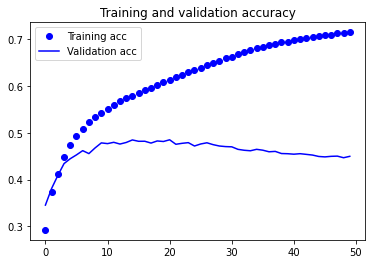

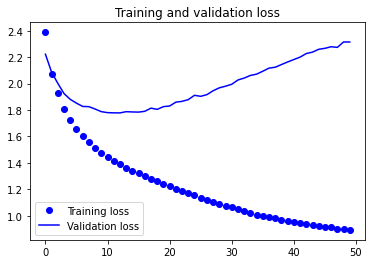

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 1 with tuning trial and error 1

In [14]:
model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(maxlen, len(chars)),dropout=0.1))

model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [15]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [16]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


Epoch 1/100
650/650 [==============================] - 46s 68ms/step - loss: 2.4410 - acc: 0.2792 - val_loss: 2.2276 - val_acc: 0.3375
Epoch 2/100
650/650 [==============================] - 44s 68ms/step - loss: 2.1699 - acc: 0.3456 - val_loss: 2.1040 - val_acc: 0.3741
Epoch 3/100
650/650 [==============================] - 44s 68ms/step - loss: 2.0511 - acc: 0.3771 - val_loss: 2.0224 - val_acc: 0.3968
Epoch 4/100
650/650 [==============================] - 42s 64ms/step - loss: 1.9618 - acc: 0.4058 - val_loss: 1.9515 - val_acc: 0.4228
Epoch 5/100
650/650 [==============================] - 43s 66ms/step - loss: 1.8892 - acc: 0.4252 - val_loss: 1.9051 - val_acc: 0.4351
Epoch 6/100
650/650 [==============================] - 45s 69ms/step - loss: 1.8363 - acc: 0.4417 - val_loss: 1.8606 - val_acc: 0.4426
Epoch 7/100
650/650 [==============================] - 42s 64ms/step - loss: 1.7888 - acc: 0.4551 - val_loss: 1.8304 - val_acc: 0.4530
Epoch 8/100
650/650 [==============================] - 

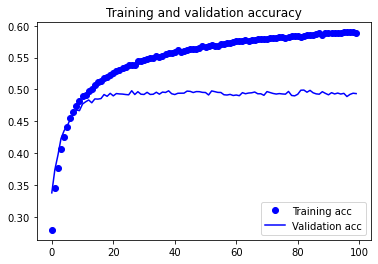

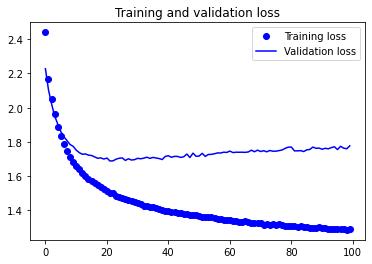

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 1 with tuning trial and error 2

In [21]:
model = keras.models.Sequential()
model.add(layers.GRU(128, input_shape=(maxlen, len(chars)),
                     dropout=0.2,
                     activation='relu'))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [22]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [23]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 45s 67ms/step - loss: 2.5308 - acc: 0.2567 - val_loss: 2.2831 - val_acc: 0.3229
Epoch 2/100
650/650 [==============================] - 45s 69ms/step - loss: 2.2620 - acc: 0.3198 - val_loss: 2.1503 - val_acc: 0.3608
Epoch 3/100
650/650 [==============================] - 45s 69ms/step - loss: 2.1788 - acc: 0.3415 - val_loss: 2.0634 - val_acc: 0.3818
Epoch 4/100
650/650 [==============================] - 45s 69ms/step - loss: 2.1118 - acc: 0.3588 - val_loss: 2.0060 - val_acc: 0.4020
Epoch 5/100
650/650 [==============================] - 45s 69ms/step - loss: 2.0561 - acc: 0.3761 - val_loss: 1.9498 - val_acc: 0.4166
Epoch 6/100
650/650 [==============================] - 45s 70ms/step - loss: 2.0085 - acc: 0.3887 - val_loss: 1.9078 - val_acc: 0.4281
Epoch 7/100
650/650 [==============================] - 45s 69ms/step - loss: 1.9721 - acc: 0.3996 - val_loss: 1.8749 - val_acc: 0.4392
Epoch 8/100
650/650 [==============================] - 

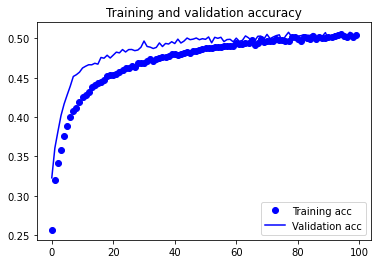

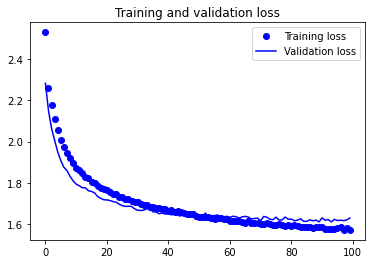

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 2 with GRU

In [39]:
model = keras.models.Sequential()

model.add(layers.GRU(128, input_shape=(maxlen, len(chars)),
                     return_sequences=True, activation='relu',
                     dropout=0.2))
model.add(layers.GRU(128))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [40]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [41]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 142s 214ms/step - loss: 2.4553 - acc: 0.2712 - val_loss: 2.1767 - val_acc: 0.3462
Epoch 2/100
650/650 [==============================] - 129s 198ms/step - loss: 2.1671 - acc: 0.3438 - val_loss: 2.0350 - val_acc: 0.3851
Epoch 3/100
650/650 [==============================] - 130s 200ms/step - loss: 2.0484 - acc: 0.3767 - val_loss: 1.9206 - val_acc: 0.4320
Epoch 4/100
650/650 [==============================] - 130s 200ms/step - loss: 1.9763 - acc: 0.3977 - val_loss: 1.8546 - val_acc: 0.4427
Epoch 5/100
650/650 [==============================] - 131s 201ms/step - loss: 1.9200 - acc: 0.4136 - val_loss: 1.8105 - val_acc: 0.4526
Epoch 6/100
650/650 [==============================] - 129s 198ms/step - loss: 1.8767 - acc: 0.4249 - val_loss: 1.7779 - val_acc: 0.4675
Epoch 7/100
650/650 [==============================] - 132s 204ms/step - loss: 1.8431 - acc: 0.4331 - val_loss: 1.7372 - val_acc: 0.4741
Epoch 8/100
650/650 [====================

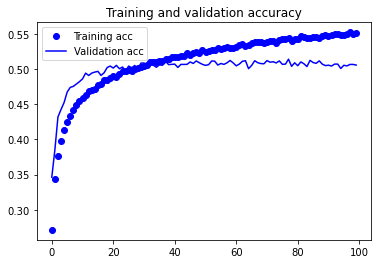

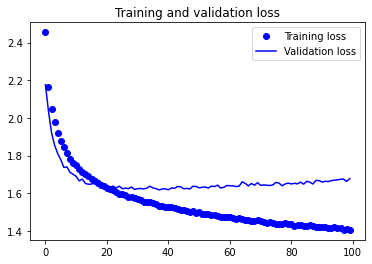

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 3 with GRU

Models 3 and 4 are mainly developed to trail and error different density and model architectures

In [19]:
model = keras.models.Sequential()

model.add(layers.GRU(64, input_shape=(maxlen, len(chars)),return_sequences=True, activation='relu',dropout=0.2))
model.add(layers.GRU(128))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [20]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [21]:
import random
import sys

history = model.fit(x, y,
              batch_size=64,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
1299/1299 [==============================] - 89s 67ms/step - loss: 2.4227 - acc: 0.2805 - val_loss: 2.1619 - val_acc: 0.3543
Epoch 2/100
1299/1299 [==============================] - 88s 67ms/step - loss: 2.1512 - acc: 0.3498 - val_loss: 2.0078 - val_acc: 0.4023
Epoch 3/100
1299/1299 [==============================] - 87s 67ms/step - loss: 2.0451 - acc: 0.3787 - val_loss: 1.8958 - val_acc: 0.4265
Epoch 4/100
1299/1299 [==============================] - 88s 68ms/step - loss: 1.9683 - acc: 0.4020 - val_loss: 1.8555 - val_acc: 0.4408
Epoch 5/100
1299/1299 [==============================] - 88s 67ms/step - loss: 1.9176 - acc: 0.4142 - val_loss: 1.7961 - val_acc: 0.4611
Epoch 6/100
1299/1299 [==============================] - 88s 68ms/step - loss: 1.8720 - acc: 0.4254 - val_loss: 1.7550 - val_acc: 0.4608
Epoch 7/100
1299/1299 [==============================] - 89s 68ms/step - loss: 1.8389 - acc: 0.4342 - val_loss: 1.7396 - val_acc: 0.4713
Epoch 8/100
1299/1299 [==================

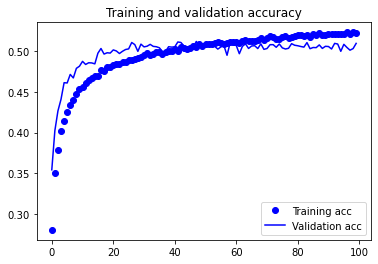

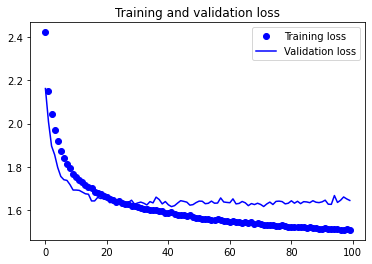

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 4 with GRU

In [36]:
model = keras.models.Sequential()

model.add(layers.GRU(32, input_shape=(maxlen, len(chars)),return_sequences=True, activation='relu',dropout=0.2))
model.add(layers.GRU(64))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [37]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [38]:
import random
import sys

history = model.fit(x, y,
              batch_size=64,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
1299/1299 [==============================] - 65s 48ms/step - loss: 2.5170 - acc: 0.2573 - val_loss: 2.2663 - val_acc: 0.3175
Epoch 2/100
1299/1299 [==============================] - 57s 44ms/step - loss: 2.2645 - acc: 0.3186 - val_loss: 2.1447 - val_acc: 0.3559
Epoch 3/100
1299/1299 [==============================] - 58s 44ms/step - loss: 2.1679 - acc: 0.3441 - val_loss: 2.0416 - val_acc: 0.3881
Epoch 4/100
1299/1299 [==============================] - 58s 45ms/step - loss: 2.1038 - acc: 0.3626 - val_loss: 1.9927 - val_acc: 0.3993
Epoch 5/100
1299/1299 [==============================] - 59s 46ms/step - loss: 2.0605 - acc: 0.3739 - val_loss: 1.9450 - val_acc: 0.4207
Epoch 6/100
1299/1299 [==============================] - 59s 45ms/step - loss: 2.0253 - acc: 0.3863 - val_loss: 1.9201 - val_acc: 0.4249
Epoch 7/100
1299/1299 [==============================] - 58s 44ms/step - loss: 1.9941 - acc: 0.3936 - val_loss: 1.8954 - val_acc: 0.4378
Epoch 8/100
1299/1299 [==================

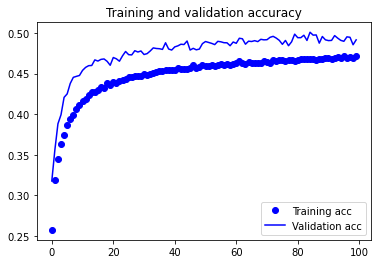

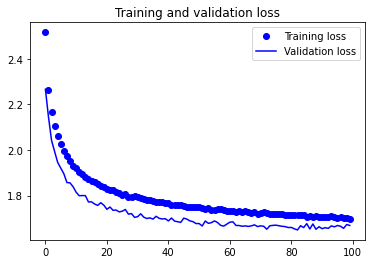

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 1 with Conv1D

In [52]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        input_shape=(maxlen,len(chars))))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [53]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [54]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 18s 27ms/step - loss: 2.6813 - acc: 0.2221 - val_loss: 2.4517 - val_acc: 0.2815
Epoch 2/100
650/650 [==============================] - 15s 23ms/step - loss: 2.2807 - acc: 0.3260 - val_loss: 2.2889 - val_acc: 0.3315
Epoch 3/100
650/650 [==============================] - 16s 25ms/step - loss: 2.0909 - acc: 0.3791 - val_loss: 2.2199 - val_acc: 0.3615
Epoch 4/100
650/650 [==============================] - 16s 25ms/step - loss: 1.9628 - acc: 0.4179 - val_loss: 2.1757 - val_acc: 0.3784
Epoch 5/100
650/650 [==============================] - 15s 22ms/step - loss: 1.8706 - acc: 0.4430 - val_loss: 2.1381 - val_acc: 0.3913
Epoch 6/100
650/650 [==============================] - 15s 24ms/step - loss: 1.7977 - acc: 0.4644 - val_loss: 2.1430 - val_acc: 0.3918
Epoch 7/100
650/650 [==============================] - 15s 23ms/step - loss: 1.7419 - acc: 0.4785 - val_loss: 2.1442 - val_acc: 0.4009
Epoch 8/100
650/650 [==============================] - 

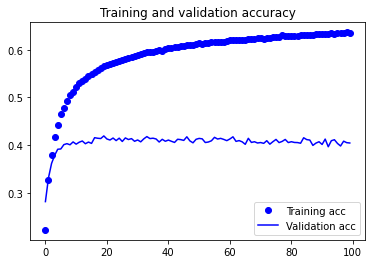

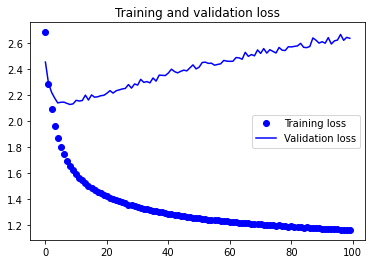

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 1 with Conv1D + tuning

In [56]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu',
                        input_shape=(maxlen,len(chars))))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [57]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [58]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 19s 29ms/step - loss: 2.7636 - acc: 0.2022 - val_loss: 2.5682 - val_acc: 0.2429
Epoch 2/100
650/650 [==============================] - 17s 26ms/step - loss: 2.4483 - acc: 0.2824 - val_loss: 2.3726 - val_acc: 0.3135
Epoch 3/100
650/650 [==============================] - 18s 27ms/step - loss: 2.2986 - acc: 0.3253 - val_loss: 2.2755 - val_acc: 0.3451
Epoch 4/100
650/650 [==============================] - 18s 27ms/step - loss: 2.2081 - acc: 0.3486 - val_loss: 2.2214 - val_acc: 0.3619
Epoch 5/100
650/650 [==============================] - 18s 27ms/step - loss: 2.1455 - acc: 0.3685 - val_loss: 2.1835 - val_acc: 0.3721
Epoch 6/100
650/650 [==============================] - 18s 28ms/step - loss: 2.0967 - acc: 0.3802 - val_loss: 2.1477 - val_acc: 0.3853
Epoch 7/100
650/650 [==============================] - 18s 28ms/step - loss: 2.0591 - acc: 0.3907 - val_loss: 2.1235 - val_acc: 0.3959
Epoch 8/100
650/650 [==============================] - 

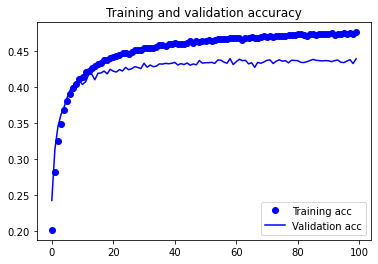

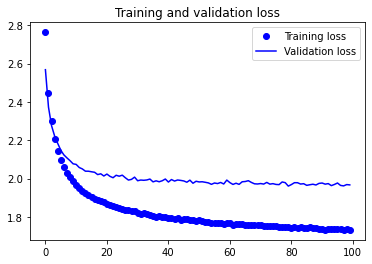

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 2 with Conv1D

In [60]:
model = Sequential()
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        input_shape=(maxlen,len(chars))))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [61]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [62]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 19s 29ms/step - loss: 2.6240 - acc: 0.2399 - val_loss: 2.3876 - val_acc: 0.3071
Epoch 2/100
650/650 [==============================] - 19s 29ms/step - loss: 2.1540 - acc: 0.3699 - val_loss: 2.1833 - val_acc: 0.3723
Epoch 3/100
650/650 [==============================] - 18s 28ms/step - loss: 1.9215 - acc: 0.4314 - val_loss: 2.1233 - val_acc: 0.3931
Epoch 4/100
650/650 [==============================] - 18s 28ms/step - loss: 1.7711 - acc: 0.4734 - val_loss: 2.1245 - val_acc: 0.3979
Epoch 5/100
650/650 [==============================] - 18s 28ms/step - loss: 1.6625 - acc: 0.5032 - val_loss: 2.0625 - val_acc: 0.4114
Epoch 6/100
650/650 [==============================] - 18s 28ms/step - loss: 1.5732 - acc: 0.5276 - val_loss: 2.0878 - val_acc: 0.4157
Epoch 7/100
650/650 [==============================] - 18s 28ms/step - loss: 1.5011 - acc: 0.5458 - val_loss: 2.1063 - val_acc: 0.4185
Epoch 8/100
650/650 [==============================] - 

C:\Users\user\AppData\Local\Temp\ipykernel_30700\291334795.py:3: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature # take a log function and then divided by temperature


 uncle vervousriyneer tranger potteright voice right deid nothin stincl thought cige nooed a die beaale could fill sleening a lits neiply ppveemed mr durtuli oureow daaming forgep sutroggeord cunblerown woy walled sttenmus hidger floor wuvd look hert ingsringanding arrewerd weakppsy narill dadnight wall klacted foppose toy rround say eye frictor ive copponee hom aurwyerv leoked her
------ temperature: 0.5
sed silently mustnt wake dursleys stole downstairs without turl door groughing startall worryw arrepled would yourse your eary staill stick stoppy front the ip booth colired mutterind berick diasting armust goinn were poustly one ron surrealing gotted ron harry watcowaed said nombir broobing pocekinling fattligglitble cruy branger iwatter bannoke said best wenflatowl couldnt dissapecually pcrrmioter opeerill done vouthing sill ggonken peoply gowsss yorroo 
------ temperature: 1.0
sed silently mustnt wake dursleys stole downstairs without turl door groughing startwoll worry stopplaal m

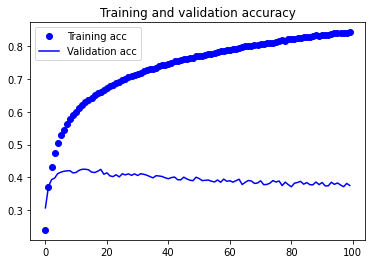

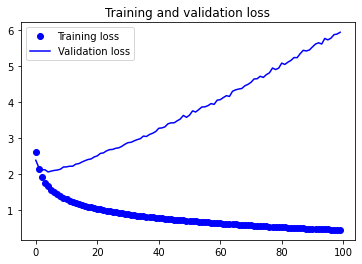

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model 2 with Conv1D + tuning

In [64]:
model = Sequential()
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        input_shape=(maxlen,len(chars))))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [65]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [66]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 23s 34ms/step - loss: 2.6852 - acc: 0.2232 - val_loss: 2.4472 - val_acc: 0.2717
Epoch 2/100
650/650 [==============================] - 23s 36ms/step - loss: 2.2979 - acc: 0.3286 - val_loss: 2.2474 - val_acc: 0.3457
Epoch 3/100
650/650 [==============================] - 23s 36ms/step - loss: 2.1117 - acc: 0.3784 - val_loss: 2.1357 - val_acc: 0.3842
Epoch 4/100
650/650 [==============================] - 23s 35ms/step - loss: 1.9963 - acc: 0.4084 - val_loss: 2.0969 - val_acc: 0.3938
Epoch 5/100
650/650 [==============================] - 23s 36ms/step - loss: 1.9156 - acc: 0.4297 - val_loss: 2.0606 - val_acc: 0.4065
Epoch 6/100
650/650 [==============================] - 23s 35ms/step - loss: 1.8514 - acc: 0.4465 - val_loss: 2.0465 - val_acc: 0.4093
Epoch 7/100
650/650 [==============================] - 23s 35ms/step - loss: 1.8058 - acc: 0.4584 - val_loss: 2.0269 - val_acc: 0.4115
Epoch 8/100
650/650 [==============================] - 

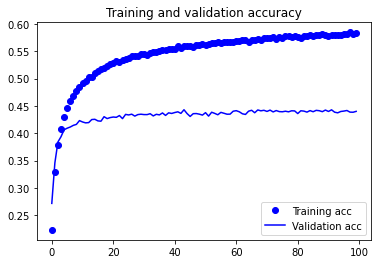

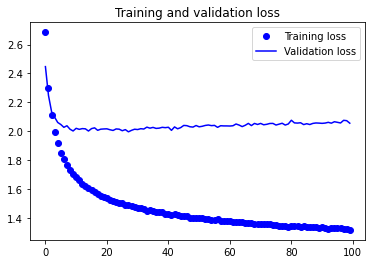

In [67]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### More tuning on model 2

In [69]:
model = Sequential()
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        input_shape=(maxlen,len(chars))))
model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [70]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [71]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 25s 37ms/step - loss: 2.7165 - acc: 0.2142 - val_loss: 2.4771 - val_acc: 0.2722
Epoch 2/100
650/650 [==============================] - 24s 37ms/step - loss: 2.3741 - acc: 0.3063 - val_loss: 2.2869 - val_acc: 0.3416
Epoch 3/100
650/650 [==============================] - 24s 37ms/step - loss: 2.2123 - acc: 0.3499 - val_loss: 2.1982 - val_acc: 0.3692
Epoch 4/100
650/650 [==============================] - 24s 37ms/step - loss: 2.1141 - acc: 0.3763 - val_loss: 2.1250 - val_acc: 0.3904
Epoch 5/100
650/650 [==============================] - 24s 36ms/step - loss: 2.0420 - acc: 0.3960 - val_loss: 2.0949 - val_acc: 0.3968
Epoch 6/100
650/650 [==============================] - 24s 36ms/step - loss: 1.9896 - acc: 0.4103 - val_loss: 2.0753 - val_acc: 0.4015
Epoch 7/100
650/650 [==============================] - 24s 37ms/step - loss: 1.9467 - acc: 0.4218 - val_loss: 2.0469 - val_acc: 0.4080
Epoch 8/100
650/650 [==============================] - 

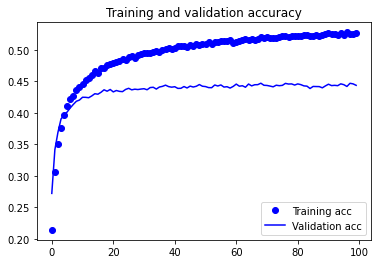

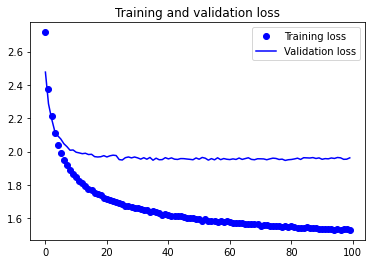

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model with LSTM

In [22]:
model = keras.models.Sequential()

model.add(layers.LSTM(128, input_shape=(maxlen, len(chars)), 
                      activation='relu',dropout=0.2))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [23]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [24]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=100,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/100
650/650 [==============================] - 61s 91ms/step - loss: 3.7702 - acc: 0.1396 - val_loss: 2.8451 - val_acc: 0.1894
Epoch 2/100
650/650 [==============================] - 54s 83ms/step - loss: 2.8489 - acc: 0.1651 - val_loss: 2.6716 - val_acc: 0.2273
Epoch 3/100
650/650 [==============================] - 53s 82ms/step - loss: 2.5264 - acc: 0.2547 - val_loss: 2.3469 - val_acc: 0.2998
Epoch 4/100
650/650 [==============================] - 53s 82ms/step - loss: 2.3890 - acc: 0.2872 - val_loss: 2.2704 - val_acc: 0.3271
Epoch 5/100
650/650 [==============================] - 53s 82ms/step - loss: 2.3374 - acc: 0.2996 - val_loss: 2.2612 - val_acc: 0.3403
Epoch 6/100
650/650 [==============================] - 53s 82ms/step - loss: 2.2994 - acc: 0.3092 - val_loss: 2.2013 - val_acc: 0.3497
Epoch 7/100
650/650 [==============================] - 53s 82ms/step - loss: 2.2685 - acc: 0.3197 - val_loss: 2.1642 - val_acc: 0.3623
Epoch 8/100
650/650 [==============================] - 

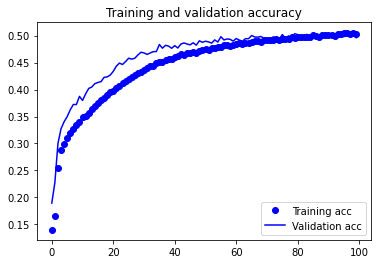

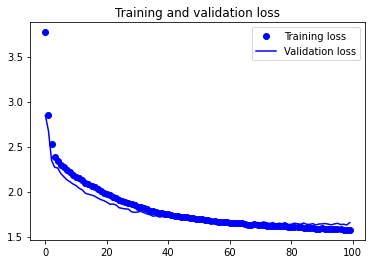

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Training with best model + slight tuning

In [40]:
model = keras.models.Sequential()

model.add(layers.GRU(128, input_shape=(maxlen, len(chars)),
                     return_sequences=True, activation='relu',dropout=0.1))
model.add(layers.GRU(128, dropout=0.2))
model.add(layers.Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

In [41]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

In [42]:
import random
import sys

history = model.fit(x, y,
              batch_size=128,
              epochs=50,
              validation_split=0.2)

# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Epoch 1/50
650/650 [==============================] - 212s 321ms/step - loss: 2.4151 - acc: 0.2857 - val_loss: 2.1431 - val_acc: 0.3674
Epoch 2/50
650/650 [==============================] - 202s 311ms/step - loss: 2.0996 - acc: 0.3628 - val_loss: 2.0128 - val_acc: 0.4045
Epoch 3/50
650/650 [==============================] - 193s 297ms/step - loss: 1.9705 - acc: 0.3981 - val_loss: 1.9100 - val_acc: 0.4295
Epoch 4/50
650/650 [==============================] - 190s 293ms/step - loss: 1.8881 - acc: 0.4227 - val_loss: 1.8347 - val_acc: 0.4479
Epoch 5/50
650/650 [==============================] - 191s 294ms/step - loss: 1.8229 - acc: 0.4423 - val_loss: 1.7953 - val_acc: 0.4575
Epoch 6/50
650/650 [==============================] - 191s 294ms/step - loss: 1.7750 - acc: 0.4534 - val_loss: 1.7664 - val_acc: 0.4689
Epoch 7/50
650/650 [==============================] - 192s 295ms/step - loss: 1.7368 - acc: 0.4651 - val_loss: 1.7485 - val_acc: 0.4770
Epoch 8/50
650/650 [============================

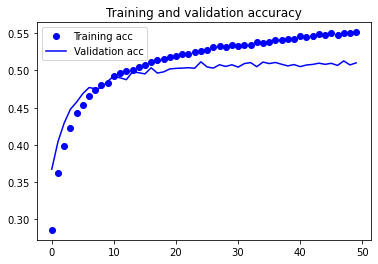

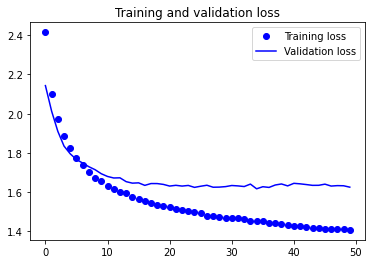

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
model.save('p2_model.h5')

## Step 3 – Use the developed Model to generate the characters / sentences

In [81]:
# takes the user input
best_model = keras.models.load_model('p2_model.h5')
text_input = np.array([input()]) #note that it has to be same len as len(chars)
text_input = text_input.tolist()
text_input = ''.join(text_input)

whos joe a distant voice asks instantly everyone nearby hear


In [82]:
# Select a text seed at random

generated_text_initial = text_input
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9, 1.0, 1.2]:
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = best_model.predict(sampled, verbose=0)[0] # to get the softmax output
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

--- Generating with seed: "whos joe a distant voice asks instantly everyone nearby hear"
------ temperature: 0.2
whos joe a distant voice asks instantly everyone nearby heard harry harry harry looked harry started hermione harry heard hermione harry harry harry harry harry wanted harry harry harry started harry harry couldnt he said hagrid harry harry ron the snitch could heard harry harry harry harry the stand even done dont wa harry started harry harry heard harry felt all the stand even done wa said hagrid harry the door show harry harry heard harry looked harry h
------ temperature: 0.3
whos joe a distant voice asks instantly everyone nearby heard harry said hagrid hermione harry potter harry gotten the stand neville fell they weasley couldnt see hermione harry looked hermione harry harry people couldnt he said hagrid let hermione harry ron harry looked harry harry felt the shelt harry the staid harry harry said hagrid harry looked hermione harry felt the snive harry the stand harr